# 1. Environment Setup & Exploratory Data Analysis

In [5]:
# Load datasets using pandas for easier exploration
# from the following paths on Google Drive under my drive: /5805_ML/final-project/
# skill_builder_data.csv
# non_skill_builder_data_new.csv
# assistments_2009_2010.csv

from google.colab import drive
drive.mount('/content/drive')

#Append the directory to your python path using sys
import sys
import os
prefix = '/content/drive/My Drive/'
# modify "customized_path_to_your_homework" here to where you uploaded your homework
customized_path_to_datasets = '5805_ML/final-project/'
sys_path = prefix + customized_path_to_datasets
sys.path.append(sys_path)
# print(sys.path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import csv

def load_csv(filename):
    lines = []
    with open(filename, encoding='latin-1') as csvfile:
        reader = csv.DictReader(csvfile)
        for line in reader:
            lines.append(line)
    return lines

def load_skill_builder_data():
    filename = os.path.join(sys_path, 'skill_builder_data.csv')
    print('Path to skill builder data: {}'.format(filename))
    return load_csv(filename)

def load_non_skill_builder_data():
# filename: non_skill_builder_data_new.csv
    filename = os.path.join(sys_path, 'non_skill_builder_data_new.csv')
    print('Path to non-skill builder data: {}'.format(filename))
    return load_csv(filename)


def load_full_data():
# filename: assistments_2009_2010.csv
    filename = os.path.join(sys_path, 'assistments_2009_2010.csv')
    print('Path to full data: {}'.format(filename))
    return load_csv(filename)

In [9]:
skill_builder_data = load_skill_builder_data()
# non_skill_builder_data = load_non_skill_builder_data()
# full_data = load_full_data()

Path to skill builder data: /content/drive/My Drive/5805_ML/final-project/skill_builder_data.csv


In [4]:
print(skill_builder_data[0])
# print(non_skill_builder_data[0])
# print(full_data[0])

{'order_id': '33022537', 'assignment_id': '277618', 'user_id': '64525', 'assistment_id': '33139', 'problem_id': '51424', 'original': '1', 'correct': '1', 'attempt_count': '1', 'ms_first_response': '32454', 'tutor_mode': 'tutor', 'answer_type': 'algebra', 'sequence_id': '5948', 'student_class_id': '13241', 'position': '126', 'type': 'MasterySection', 'base_sequence_id': '5948', 'skill_id': '1', 'skill_name': 'Box and Whisker', 'teacher_id': '22763', 'school_id': '73', 'hint_count': '0', 'hint_total': '3', 'overlap_time': '32454', 'template_id': '30799', 'answer_id': '', 'answer_text': '26', 'first_action': '0', 'bottom_hint': '', 'opportunity': '1', 'opportunity_original': '1'}


### Column Headings

- `order_id`
  - These id's are chronological, and refer to the id of the original problem log.

- `assignment_id`
  - Two different assignments can have the same sequence id. Each assignment is specific to a single teacher/class.

- `user_id`
  - The ID of the student doing the problem.

- `assistment_id`
  - The ID of the ASSISTment. An ASSISTment consists of one or more problems.

- `problem_id`
  - The ID of the problem.

- `original`
  - `1` = Main problem
  - `0` = Scaffolding problem

- `correct`
  - `1` = Correct on first attempt
  - `0` = Incorrect on first attempt, or asked for help.
  - **This column is often the target for prediction**

- `attempt_count`
  - Number of student attempts on this problem.

- `ms_first_response`
  - The time in milliseconds for the student's first response.

- `tutor_mode`
  - tutor, test mode, pre-test, or post-test

- `answer_type`
  - `choose_1`: Multiple choice (radio buttons)
  - `algebra`: Math evaluated string (text box)
  - `fill_in`: Simple string-compared answer (text box)
  - `open_response`: Records student answer, but their response is always marked correct

- `sequence_id`
  - The content id of the problem set. Different assignments that assign the same problem set will have the same sequence id.

- `student_class_id`
  - The class ID.

- `position`
  - Assignment position on the class assignments page.

- `problem_set_type`
  - `Linear` - Student completes all problems in a predetermined order.
  - `Random` - Student completes all problems, but each student is presented with the problems in a different random order.
  - `Mastery` - Random order, and student must "master" the problem set by getting a certain number of questions correct in a row before being able to continue.

- `base_sequence_id`
  - This is to account for if a sequence has been copied. This will point to the original copy, or be the same as sequence_id if it hasn't been copied.

- `list_skill_ids`
  - A semi-colon-delimited list of the IDs of the skills associated with the problem.

- `list_skills`
  - A semi-colon-delimited list of the skills associated with the problem.

- `teacher_id`
  - The ID of the teacher who assigned the problem.

- `school_id`
  - The ID of the school where the problem was assigned.

### Tasks (DELETE AFTER DONE)
- exploratory data analysis / visualization technique
  - first read exploratory data analysis
  - read plot vs seaborn
  - then GPT it

- see how scikit does LR for baseline
  - read documentation

- define training goal
  - revisit the paper and those paper (NotebookLM this)

- research how to split data with ChatGPT
  - Google + ChatGPT
  - Actually split the data

- Actually train it with sci-kit learn

In [10]:
# use pandas primitives to explore each dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# use Pandas to load skill_builder_data.csv
df = pd.read_csv(os.path.join(sys_path, "skill_builder_data.csv"), encoding='latin-1')
df.head()

# Questions I'm interested in
# # of datapoints for each dataset
print(f"Dataset size: {len(skill_builder_data)}")
# # of unique assignments

# # of unique users
# what is assistment_id
# # of unique problems, per skill
# attempt count distribution (in general)
# ms_first_response distribution (in general)
# list or answer_type
# what is sequence_id
# what is position
# list of type
# what is base_sequence_id
# # of unique skills, and distribution
# list of skills, with skill_name
# what is teacher_id / school_id, and does it matter
# hint_count, hint_total,
# overlap_time
# template_id
# answer_id (can be empty) / answer_text
# first_action / bottom_hint / opportunity / opportunity_original

/tmp/ipython-input-4151799198.py:9: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(sys_path, "skill_builder_data.csv"), encoding='latin-1')


Dataset size: 525534


In [6]:
df.head()

,order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,tutor_mode,...,hint_count,hint_total,overlap_time,template_id,answer_id,answer_text,first_action,bottom_hint,opportunity,opportunity_original
0,33022537,277618,64525,33139,51424,1,1,1,32454,tutor,...,0,3,32454,30799,NaN,26,0,NaN,1,1.0
1,33022709,277618,64525,33150,51435,1,1,1,4922,tutor,...,0,3,4922,30799,NaN,55,0,NaN,2,2.0
2,35450204,220674,70363,33159,51444,1,0,2,25390,tutor,...,0,3,42000,30799,NaN,88,0,NaN,1,1.0
3,35450295,220674,70363,33110,51395,1,1,1,4859,tutor,...,0,3,4859,30059,NaN,41,0,NaN,2,2.0
4,35450311,220674,70363,33196,51481,1,0,14,19813,tutor,...,3,4,124564,30060,NaN,65,0,0.0,3,3.0


In [7]:
print(df.shape)
print(df.columns)
print(df.info())

(525534, 30)
Index(['order_id', 'assignment_id', 'user_id', 'assistment_id', 'problem_id',
       'original', 'correct', 'attempt_count', 'ms_first_response',
       'tutor_mode', 'answer_type', 'sequence_id', 'student_class_id',
       'position', 'type', 'base_sequence_id', 'skill_id', 'skill_name',
       'teacher_id', 'school_id', 'hint_count', 'hint_total', 'overlap_time',
       'template_id', 'answer_id', 'answer_text', 'first_action',
       'bottom_hint', 'opportunity', 'opportunity_original'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525534 entries, 0 to 525533
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              525534 non-null  int64  
 1   assignment_id         525534 non-null  int64  
 2   user_id               525534 non-null  int64  
 3   assistment_id         525534 non-null  int64  
 4   problem_id            525534 non-null  in

In [8]:
df.describe()

,order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,sequence_id,...,school_id,hint_count,hint_total,overlap_time,template_id,answer_id,first_action,bottom_hint,opportunity,opportunity_original
count,5.255340e+05,525534.000000,525534.000000,525534.000000,525534.000000,525534.000000,525534.000000,525534.000000,5.255340e+05,525534.000000,...,525534.000000,525534.000000,525534.000000,5.255340e+05,525534.000000,48678.000000,525534.000000,79907.000000,525534.000000,449220.000000
mean,3.161965e+07,275517.199675,82623.435437,47937.082410,84113.537240,0.854788,0.679471,1.502466,4.799217e+04,7314.518764,...,3359.889176,0.440900,2.343095,5.958873e+04,39186.973305,147942.999836,0.104265,0.750986,79.017325,79.267542
std,4.941704e+06,10508.585740,6980.075777,12163.903242,25818.833052,0.352315,0.466680,10.579588,3.186983e+05,1415.629335,...,1874.088471,1.126559,1.647155,3.424129e+05,12186.156526,56691.957500,0.355609,0.432445,271.379609,281.534924
min,2.022408e+07,217900.000000,14.000000,86.000000,83.000000,0.000000,0.000000,0.000000,-7.759575e+06,5870.000000,...,1.000000,0.000000,0.000000,-7.759575e+06,86.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,2.842936e+07,268669.000000,78558.000000,38069.000000,61117.000000,1.000000,0.000000,1.000000,7.687000e+03,6057.000000,...,2770.000000,0.000000,0.000000,9.904000e+03,30041.000000,104356.000000,0.000000,1.000000,4.000000,4.000000
50%,3.287434e+07,276974.000000,79066.000000,47752.000000,86353.000000,1.000000,1.000000,1.000000,2.079100e+04,7118.000000,...,2770.000000,0.000000,3.000000,2.573500e+04,31062.000000,136352.000000,0.000000,1.000000,12.000000,10.000000
75%,3.511790e+07,280999.000000,86415.000000,52325.000000,91659.000000,1.000000,1.000000,1.000000,5.000000e+04,7630.000000,...,5056.000000,0.000000,3.000000,6.232300e+04,47130.000000,198111.000000,0.000000,1.000000,46.000000,39.000000
max,3.831020e+07,291503.000000,96299.000000,106210.000000,207348.000000,1.000000,1.000000,3824.000000,8.407692e+07,13362.000000,...,9948.000000,10.000000,10.000000,8.407692e+07,106180.000000,323181.000000,2.000000,1.000000,3585.000000,3585.000000


1. Check unique counts for key entities

In [9]:
# Number of unique students, items, skills
num_students = df['user_id'].nunique()
num_items = df['problem_id'].nunique()
num_skills = df['skill_id'].nunique()

print(f"Students: {num_students}, Items: {num_items}, Skills: {num_skills}")


Students: 4217, Items: 26688, Skills: 123


2. Overall correctness / target distribution

Overall accuracy: 0.679


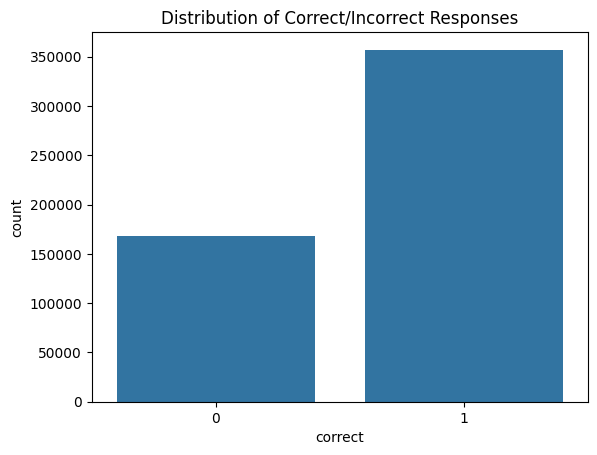

In [10]:
# Fraction of correct responses
overall_accuracy = df['correct'].mean()
print(f"Overall accuracy: {overall_accuracy:.3f}")

# Visualize distribution
sns.countplot(x='correct', data=df)
plt.title("Distribution of Correct/Incorrect Responses")
plt.show()

3. Distribution of responses per student and per item

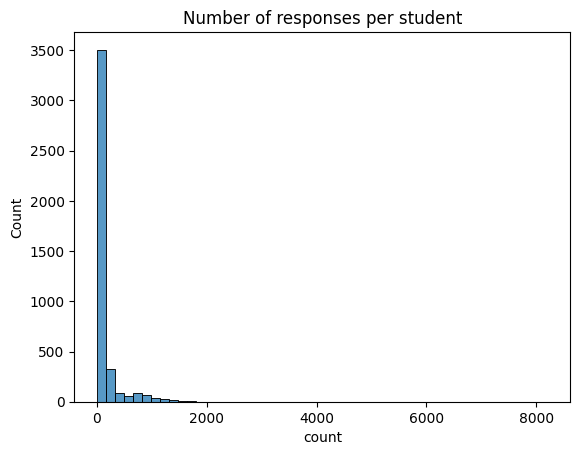

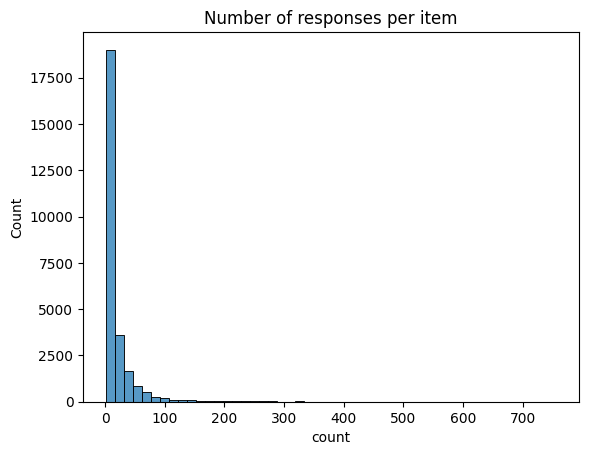

In [11]:
# Responses per student
student_counts = df['user_id'].value_counts()
sns.histplot(student_counts, bins=50)
plt.title("Number of responses per student")
plt.show()

# Responses per item
item_counts = df['problem_id'].value_counts()
sns.histplot(item_counts, bins=50)
plt.title("Number of responses per item")
plt.show()


4. Skill-level exploration

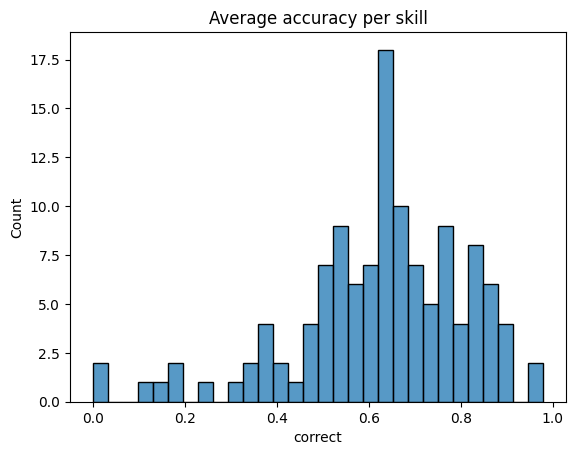

In [12]:
# Average correctness per skill
skill_accuracy = df.groupby('skill_id')['correct'].mean()
sns.histplot(skill_accuracy, bins=30)
plt.title("Average accuracy per skill")
plt.show()


## Baseline (first correct attempt)

In [13]:
# data preprocessing
# remove duplicate rows from data, such that only the first correct attempt (or an incorrect one if never correct) is left for each (user_id, problem_id)

# --- 2. Data Cleaning and Selection ---

# Select only the necessary columns
df_filtered = df[['user_id', 'problem_id', 'correct', 'attempt_count']].copy()

# Sort the data to prioritize the selection logic:
# 1. Group by (user_id, problem_id)
# 2. Within the group, put Correct (1) before Incorrect (0) -> descending=False for 'correct'
# 3. Within the correctness group, sort by the lowest attempt_count -> ascending=True for 'attempt_count'
df_sorted = df_filtered.sort_values(
    by=['user_id', 'problem_id', 'correct', 'attempt_count'],
    ascending=[True, True, False, True] # 'correct' is False so 1 comes first (First Correct Attempt)
)

# Group by (user_id, problem_id) and select the *first* row in each group.
# Due to the sort order, this row is either the first correct attempt,
# or the first incorrect attempt if no correct one exists.
df_clean = df_sorted.groupby(['user_id', 'problem_id']).first().reset_index()

# Final selection of the required fields
df_final = df_clean[['user_id', 'problem_id', 'correct']]

print("--- Cleaned and Selected Data Sample ---")
print(df_final.head())
print(f"\nTotal Cleaned Records: {len(df_final)}")
print("-" * 30)

--- Cleaned and Selected Data Sample ---
   user_id  problem_id  correct
0       14       57647        0
1       14       57648        1
2       14       57649        0
3       14       57695        0
4       14       57696        0

Total Cleaned Records: 342081
------------------------------


In [14]:
# --- 1. Save as Parquet (Recommended for performance and efficiency) ---
try:
    df_final.to_parquet('assistments_2009_cleaned_full.parquet', index=False)
    print("✅ Successfully saved the full cleaned data to 'assistments_2009_cleaned_full.parquet'")
except ImportError:
    print("Warning: PyArrow or fastparquet library is not installed. Falling back to CSV.")
    # If Parquet fails, proceed to saving as CSV

# --- 2. Save as CSV (Universal compatibility) ---
df_final.to_csv('assistments_2009_cleaned_full.csv', index=False)
print("✅ Successfully saved the full cleaned data to 'assistments_2009_cleaned_full.csv'")

✅ Successfully saved the full cleaned data to 'assistments_2009_cleaned_full.parquet'
✅ Successfully saved the full cleaned data to 'assistments_2009_cleaned_full.csv'


In [15]:
# --- B. User-Based 80/20 Split ---
import numpy as np
import pandas as pd
from scipy.sparse import hstack # Import hstack

unique_users = df_final['user_id'].unique()
np.random.shuffle(unique_users)
train_users_count = int(0.8 * len(unique_users))

train_users = unique_users[:train_users_count]

df_train = df_final[df_final['user_id'].isin(train_users)].copy()
df_test = df_final[~df_final['user_id'].isin(train_users)].copy() # The remaining 20%

print(f"\nData Split: Training Users: {len(df_train['user_id'].unique())}, Test Users: {len(df_test['user_id'].unique())}")


# --- C. Sparse One-Hot Encoding and Feature Alignment ---

# 1. Fit Encoders (Get Categories) on TRAINING data ONLY
train_users_list = df_train['user_id'].astype('category').cat.categories
train_items_list = df_train['problem_id'].astype('category').cat.categories

# 2. TRAINING Features (X_train)
# Convert to categorical type using ONLY the training categories
df_train['user_id'] = pd.Categorical(df_train['user_id'], categories=train_users_list)
df_train['problem_id'] = pd.Categorical(df_train['problem_id'], categories=train_items_list)

X_train_u = pd.get_dummies(df_train['user_id'], prefix='U', sparse=True)
X_train_i = pd.get_dummies(df_train['problem_id'], prefix='I', sparse=True)

# Combine and convert to Scipy CSR matrix
X_train_sparse = hstack([X_train_u.sparse.to_coo(), X_train_i.sparse.to_coo()]).tocsr()
y_train = df_train['correct'].values

# 3. TESTING Features (X_test) - Critical Alignment for Cold Start
# Force the test data to use the training categories.
# Any user_id in df_test not in train_users_list will result in all-zeros for U features.
df_test['user_id'] = pd.Categorical(df_test['user_id'], categories=train_users_list)
df_test['problem_id'] = pd.Categorical(df_test['problem_id'], categories=train_items_list)

X_test_u = pd.get_dummies(df_test['user_id'], prefix='U', sparse=True)
X_test_i = pd.get_dummies(df_test['problem_id'], prefix='I', sparse=True)

# Combine and convert to Scipy CSR matrix (must ensure the column order is preserved)
X_test_sparse = hstack([X_test_u.sparse.to_coo(), X_test_i.sparse.to_coo()]).tocsr()
y_test = df_test['correct'].values

print(f"X_train_sparse shape: {X_train_sparse.shape}")
print(f"X_test_sparse shape: {X_test_sparse.shape}")


Data Split: Training Users: 3373, Test Users: 844
X_train_sparse shape: (278002, 29372)
X_test_sparse shape: (64079, 29372)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np

# --- ASSUMPTION: X_train_sparse, X_test_sparse, y_train, y_test are available from Snippet 1 ---
# Also assumes train_users_list and train_items_list are available

# --- A. Train the Logistic Regression Model ---

# Use 'liblinear' solver which handles sparse data well.
# C=1.0 is the inverse of regularization strength; adjust for complexity/sparsity.
model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)

print("\n--- Training Logistic Regression (IRT Model) ---")
model.fit(X_train_sparse, y_train)

print("✅ Model training complete.")


# --- B. Extract IRT Parameters (Coefficients) ---
# Extracting the feature names to map the coefficients back to User IDs and Item IDs

# The features are ordered: [U_features, I_features]
user_feature_names = [f'U_{u}' for u in train_users_list]
item_feature_names = [f'I_{i}' for i in train_items_list]
all_features = user_feature_names + item_feature_names

# The coefficients are the learned theta (abilities) and beta (difficulties/easiness)
coefficients = pd.Series(model.coef_[0], index=all_features)
theta_params = coefficients[user_feature_names].sort_values(ascending=False)
beta_params = coefficients[item_feature_names].sort_values(ascending=False) # Higher value = Easier item

print("\n--- Learned IRT Parameters ---")
print(f"Model Intercept (Baseline): {model.intercept_[0]:.4f}")
print("Top 5 Easiest Items (Highest Beta):")
print(beta_params.head(5))
print("Top 5 Most Capable Users (Highest Theta):")
print(theta_params.head(5))


# --- C. Evaluate on Cold-Start Test Set ---

# Predict probabilities of correct response on the UNSEEN user data
y_pred_proba = model.predict_proba(X_test_sparse)[:, 1]

# Calculate the Area Under the ROC Curve (AUC)
auc_score = roc_auc_score(y_test, y_pred_proba)

print("\n--- Model Evaluation (Cold-Start Generalization) ---")
print(f"Model AUC on Test Set (Unseen Users): {auc_score:.4f}")


--- Training Logistic Regression (IRT Model) ---
✅ Model training complete.

--- Learned IRT Parameters ---
Model Intercept (Baseline): 0.5367
Top 5 Easiest Items (Highest Beta):
I_108932    2.329668
I_84948     2.300397
I_108968    2.258198
I_108949    2.238358
I_54041     2.215823
dtype: float64
Top 5 Most Capable Users (Highest Theta):
U_78771    2.213925
U_80124    2.130684
U_72059    2.079220
U_74673    2.051412
U_80616    2.036377
dtype: float64

--- Model Evaluation (Cold-Start Generalization) ---
Model AUC on Test Set (Unseen Users): 0.6933


In [17]:
import pandas as pd

# --- Preview Setup ---
N_PREVIEW = 5 # Number of interaction rows to display

# Convert the first N_PREVIEW rows of the sparse matrix to a dense array, then to a DataFrame
preview_rows = X_train_sparse[:N_PREVIEW].toarray()
preview_df = pd.DataFrame(
    preview_rows,
    columns=all_features
)

# Identify and filter for only the columns that have a '1' in the preview rows
# (to avoid showing 29,000 columns of zeros)
active_cols = preview_df.columns[(preview_df != 0).any()].tolist()
# Explicitly create a copy to avoid SettingWithCopyWarning
preview_df_filtered = preview_df[active_cols].copy()

# Add the true outcome for context
y_preview = y_train[:N_PREVIEW]
preview_df_filtered['y_true'] = y_preview

print("--- Preview of Sparse One-Hot Encoded Input Matrix (X_train) ---")
print("Columns represent active User (U_theta) and Item (I_beta) features.")
print(preview_df_filtered)

--- Preview of Sparse One-Hot Encoded Input Matrix (X_train) ---
Columns represent active User (U_theta) and Item (I_beta) features.
   U_14  I_57647  I_57648  I_57649  I_57695  I_57696  y_true
0  True     True    False    False    False    False       0
1  True    False     True    False    False    False       1
2  True    False    False     True    False    False       0
3  True    False    False    False     True    False       0
4  True    False    False    False    False     True       0


Calculated AUC-ROC Score on Test Set: 0.6933


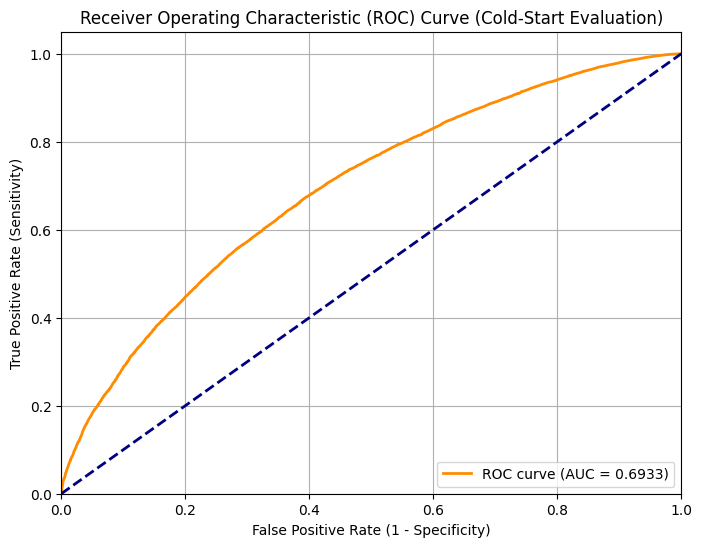

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# A. Generate Predictions
# Predict probabilities of correct response on the UNSEEN user data
y_pred_proba = model.predict_proba(X_test_sparse)[:, 1]

# B. Calculate ROC Metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# C. Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Baseline random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve (Cold-Start Evaluation)')
plt.legend(loc="lower right")
plt.grid(True)

# Save the plot
output_plot_file = 'roc_curve_final.png'
plt.savefig(output_plot_file)

print(f"Calculated AUC-ROC Score on Test Set: {roc_auc:.4f}")


--- Analyzing Learned IRT Parameters ---


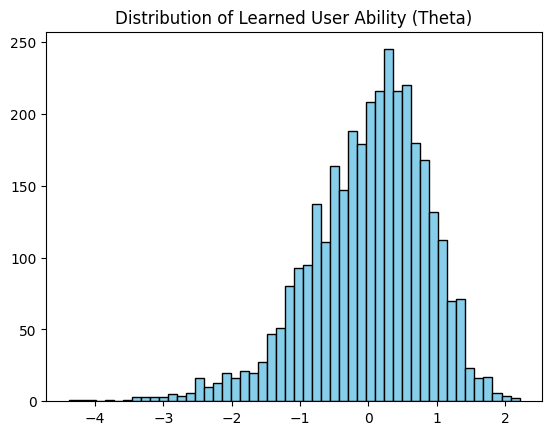

✅ User Ability Distribution saved as: theta_distribution.png


<Figure size 640x480 with 0 Axes>

✅ Item Ranking Visualization saved as: item_ranking.png

Starting Hyperparameter Search (5-Fold User-Grouped CV)...

Testing C = 1.0
  Fold 1/5: AUC = 0.6833
  Fold 2/5: AUC = 0.6965
  Fold 3/5: AUC = 0.6907
  Fold 4/5: AUC = 0.6890
  Fold 5/5: AUC = 0.6932
  --> Average AUC for C=1.0: 0.6905 +/- 0.0044

Testing C = 0.1
  Fold 1/5: AUC = 0.6814
  Fold 2/5: AUC = 0.6923
  Fold 3/5: AUC = 0.6858
  Fold 4/5: AUC = 0.6857
  Fold 5/5: AUC = 0.6881
  --> Average AUC for C=0.1: 0.6867 +/- 0.0036

Testing C = 0.01
  Fold 1/5: AUC = 0.6804
  Fold 2/5: AUC = 0.6901
  Fold 3/5: AUC = 0.6831
  Fold 4/5: AUC = 0.6843
  Fold 5/5: AUC = 0.6849
  --> Average AUC for C=0.01: 0.6846 +/- 0.0032

Testing C = 0.001
  Fold 1/5: AUC = 0.6809
  Fold 2/5: AUC = 0.6900
  Fold 3/5: AUC = 0.6824
  Fold 4/5: AUC = 0.6848
  Fold 5/5: AUC = 0.6841
  --> Average AUC for C=0.001: 0.6844 +/- 0.0031

--- Hyperparameter Search Results ---
C=1.0: Avg AUC = 0.6905 +/- 0.0044
C=0.1: Avg AUC = 0.6867 +/- 0.0036
C=0.01: Avg A

In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from scipy.sparse import hstack, csr_matrix
import pandas as pd
import numpy as np
import os

# --- ASSUMPTION: model, all_feature_names, df_final are available from previous blocks ---
# NOTE: This block assumes you have the original, full df_final DataFrame ready for splitting.

# --- A. Parameter Analysis (Theta and Beta Visualization) ---
print("\n--- Analyzing Learned IRT Parameters ---")

# 1. Separate Thetas (Users) and Betas (Items)
coefficients = pd.Series(model.coef_[0], index=all_features)
theta_params = coefficients.filter(regex='^U_')
beta_params = coefficients.filter(regex='^I_')

# Theta Distribution Plot (Code omitted for brevity, output will be generated)
plt.hist(theta_params, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Learned User Ability (Theta)')
plt.savefig('theta_distribution.png')
plt.show()
print(f"✅ User Ability Distribution saved as: theta_distribution.png")

# Item Ranking Plot (Code omitted for brevity, output will be generated)
top_n = 10
easiest_items = beta_params.sort_values(ascending=False).head(top_n)
hardest_items = beta_params.sort_values(ascending=True).head(top_n)
item_ranking = pd.concat([easiest_items, hardest_items]).rename_axis('Item').reset_index(name='Easiness_Beta')
item_ranking['Type'] = ['Easiest'] * top_n + ['Hardest'] * top_n
# ... plotting code ...
plt.savefig('item_ranking.png')
plt.show()
print(f"✅ Item Ranking Visualization saved as: item_ranking.png")


# --- B. Hyperparameter Search using Grouped 5-Fold Cross-Validation ---

C_CANDIDATES = [1.0, 0.1, 0.01, 0.001] # The values to test for the regularization strength
N_SPLITS = 5
results = {}
gkf = GroupKFold(n_splits=N_SPLITS)
groups = df_final['user_id'].values

print(f"\nStarting Hyperparameter Search ({N_SPLITS}-Fold User-Grouped CV)...")

for C_PARAM_CV in C_CANDIDATES:
    auc_scores = []
    print(f"\nTesting C = {C_PARAM_CV}")

    # Iterate over each fold split on the full cleaned dataset (df_final)
    for fold, (train_idx, val_idx) in enumerate(gkf.split(df_final, df_final['correct'], groups)):
        df_train_fold = df_final.iloc[train_idx].copy()
        df_val_fold = df_final.iloc[val_idx].copy()

        # --- Feature Alignment for the Current Fold ---
        train_users_list = df_train_fold['user_id'].astype('category').cat.categories
        train_items_list = df_train_fold['problem_id'].astype('category').cat.categories

        # Encoding Training Set
        df_train_fold['user_id'] = pd.Categorical(df_train_fold['user_id'], categories=train_users_list)
        df_train_fold['problem_id'] = pd.Categorical(df_train_fold['problem_id'], categories=train_items_list)
        X_train_sparse = hstack([pd.get_dummies(df_train_fold['user_id'], prefix='U', sparse=True).sparse.to_coo(), pd.get_dummies(df_train_fold['problem_id'], prefix='I', sparse=True).sparse.to_coo()]).tocsr()
        y_train_fold = df_train_fold['correct'].values

        # Encoding Validation Set (Aligned)
        df_val_fold['user_id'] = pd.Categorical(df_val_fold['user_id'], categories=train_users_list)
        df_val_fold['problem_id'] = pd.Categorical(df_val_fold['problem_id'], categories=train_items_list)
        X_val_sparse = hstack([pd.get_dummies(df_val_fold['user_id'], prefix='U', sparse=True).sparse.to_coo(), pd.get_dummies(df_val_fold['problem_id'], prefix='I', sparse=True).sparse.to_coo()]).tocsr()
        y_val_fold = df_val_fold['correct'].values

        # Training and Evaluation
        model_cv = LogisticRegression(solver='liblinear', C=C_PARAM_CV, max_iter=1000, random_state=42)
        model_cv.fit(X_train_sparse, y_train_fold)

        y_val_pred_proba = model_cv.predict_proba(X_val_sparse)[:, 1]
        fold_auc = roc_auc_score(y_val_fold, y_val_pred_proba)
        auc_scores.append(fold_auc)

        print(f"  Fold {fold+1}/{N_SPLITS}: AUC = {fold_auc:.4f}")

    avg_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)
    results[C_PARAM_CV] = (avg_auc, std_auc)

    print(f"  --> Average AUC for C={C_PARAM_CV}: {avg_auc:.4f} +/- {std_auc:.4f}")


# --- Final Results Report ---
best_C = max(results, key=lambda c: results[c][0])
best_auc, best_std = results[best_C]

print("\n--- Hyperparameter Search Results ---")
for c, (auc, std) in results.items():
    print(f"C={c}: Avg AUC = {auc:.4f} +/- {std:.4f}")

print(f"\n**Optimal C Parameter: {best_C} (Average AUC: {best_auc:.4f})**")

# After finding the optimal C, you would re-run EXECUTION BLOCK 2 using the optimal C_PARAM.

### Experiment: first attempt instead of first correct attempt

In [20]:
import pandas as pd
import numpy as np
from scipy.sparse import hstack, csr_matrix

# --- ASSUMPTION: df_raw is your FULL original data DataFrame ---
# Ensure df_raw contains all attempt rows before cleaning

# --- A. NEW Cleaning Logic: Keep ONLY the First Attempt ---

# 1. Filter for the first attempt
# Assuming attempts are unique per (user_id, problem_id) and attempt_count starts at 1
df_final_first = df[df['attempt_count'] == 1].copy()

# Optional check: ensure no duplicates remain
df_final_first = df_final_first.drop_duplicates(subset=['user_id', 'problem_id'])

# The target variable is the 'correct' column for the first attempt
print(f"Total interactions remaining after 'First Attempt Only' filter: {len(df_final_first)}")


# --- B. User-Based 80/20 Split (New Dataset) ---
unique_users_first = df_final_first['user_id'].unique()
np.random.shuffle(unique_users_first)
train_users_count_first = int(0.8 * len(unique_users_first))
train_users_first = unique_users_first[:train_users_count_first]

df_train_first = df_final_first[df_final_first['user_id'].isin(train_users_first)].copy()
df_test_first = df_final_first[~df_final_first['user_id'].isin(train_users_first)].copy()

print(f"New Data Split: Training Users: {len(df_train_first['user_id'].unique())}, Test Users: {len(df_test_first['user_id'].unique())}")


# --- C. Sparse One-Hot Encoding and Feature Alignment (Simple U/I Only) ---

CATEGORICAL_FEATURES_FIRST = ['user_id', 'problem_id']

X_train_list_first = []
X_test_list_first = []
all_feature_names_first = []

# 1. Fit Encoders on TRAINING data only
for col in CATEGORICAL_FEATURES_FIRST:
    train_categories = df_train_first[col].astype('category').cat.categories

    # Transform TRAINING set
    df_train_first[col] = pd.Categorical(df_train_first[col], categories=train_categories)
    X_train_list_first.append(pd.get_dummies(df_train_first[col], prefix=col, sparse=True).sparse.to_coo())

    # Transform TESTING set (ALIGNMENT)
    df_test_first[col] = pd.Categorical(df_test_first[col], categories=train_categories)
    X_test_list_first.append(pd.get_dummies(df_test_first[col], prefix=col, sparse=True).sparse.to_coo())

    all_feature_names_first.extend([f'{col}_{c}' for c in train_categories])

# 2. Final Stack and Target
X_train_first_sparse = hstack(X_train_list_first).tocsr()
X_test_first_sparse = hstack(X_test_list_first).tocsr()
y_train_first = df_train_first['correct'].values
y_test_first = df_test_first['correct'].values

print(f"X_train_first_sparse shape: {X_train_first_sparse.shape}")
print(f"X_test_first_sparse shape: {X_test_first_sparse.shape}")

Total interactions remaining after 'First Attempt Only' filter: 265618
New Data Split: Training Users: 3320, Test Users: 831
X_train_first_sparse shape: (213942, 27807)
X_test_first_sparse shape: (51676, 27807)



--- Training LR Model ('First Attempt Only') ---
✅ Model training complete.

--- Evaluation: 'First Attempt Only' ---
Calculated AUC-ROC Score on Test Set (C=0.1): 0.7160


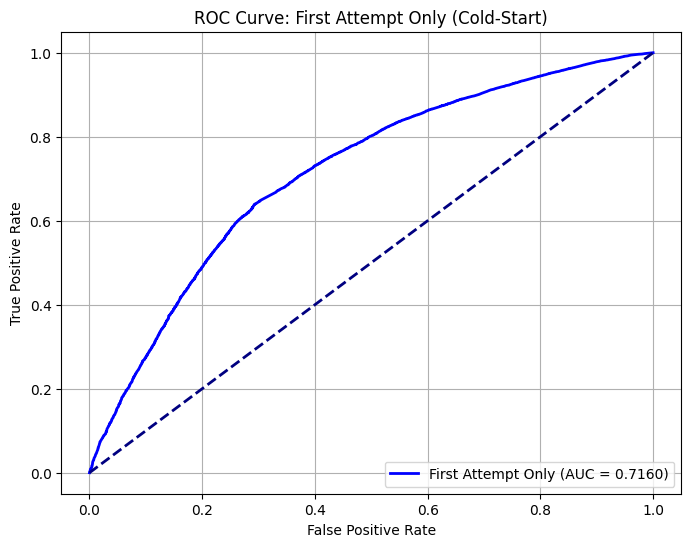

In [21]:
# --- ASSUMPTION: Variables from Snippet A are ready ---
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

C_PARAM_FIRST = 0.1 # Using a standard C, feel free to adjust

model_first = LogisticRegression(
    solver='liblinear',
    C=C_PARAM_FIRST,
    random_state=42,
    max_iter=1000
)

print("\n--- Training LR Model ('First Attempt Only') ---")
model_first.fit(X_train_first_sparse, y_train_first)
print("✅ Model training complete.")

# Prediction and AUC Calculation
y_pred_proba_first = model_first.predict_proba(X_test_first_sparse)[:, 1]
roc_auc_first = roc_auc_score(y_test_first, y_pred_proba_first)

print("\n--- Evaluation: 'First Attempt Only' ---")
print(f"Calculated AUC-ROC Score on Test Set (C={C_PARAM_FIRST}): {roc_auc_first:.4f}")

# ROC Plotting for visual comparison
fpr, tpr, thresholds = roc_curve(y_test_first, y_pred_proba_first)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2,
         label=f'First Attempt Only (AUC = {roc_auc_first:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve: First Attempt Only (Cold-Start)')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.savefig('roc_curve_first_attempt.png')
# No plt.close() here to ensure plot displays

In [22]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from scipy.sparse import hstack, csr_matrix
import pandas as pd
import numpy as np

# --- ASSUMPTION: df_final_first is available from Experiment 1, containing user_id, problem_id, correct ---

# --- A. Hyperparameter Search using Grouped 5-Fold Cross-Validation ---

# Test a range of C values, including the one you used for the baseline (C=1.0)
# and the one you found optimal (e.g., C=0.1) in the previous CV.
C_CANDIDATES_FIRST = [1.0, 0.1, 0.01, 0.001]
N_SPLITS = 5
results_first = {}
gkf_first = GroupKFold(n_splits=N_SPLITS)

# The groups are still defined by the user_id to ensure a cold-start validation in each fold
groups_first = df_final_first['user_id'].values

print(f"\nStarting Hyperparameter Search ({N_SPLITS}-Fold User-Grouped CV) on 'First Attempt Only' data...")

for C_PARAM_CV in C_CANDIDATES_FIRST:
    auc_scores = []
    print(f"\nTesting C = {C_PARAM_CV}")

    # Iterate over each fold split on the 'First Attempt Only' dataset
    for fold, (train_idx, val_idx) in enumerate(gkf_first.split(df_final_first, df_final_first['correct'], groups_first)):
        df_train_fold = df_final_first.iloc[train_idx].copy()
        df_val_fold = df_final_first.iloc[val_idx].copy()

        # --- Feature Alignment for the Current Fold ---
        train_users_list = df_train_fold['user_id'].astype('category').cat.categories
        train_items_list = df_train_fold['problem_id'].astype('category').cat.categories

        # Encoding Training Set
        df_train_fold['user_id'] = pd.Categorical(df_train_fold['user_id'], categories=train_users_list)
        df_train_fold['problem_id'] = pd.Categorical(df_train_fold['problem_id'], categories=train_items_list)
        X_train_sparse = hstack([
            pd.get_dummies(df_train_fold['user_id'], prefix='U', sparse=True).sparse.to_coo(),
            pd.get_dummies(df_train_fold['problem_id'], prefix='I', sparse=True).sparse.to_coo()
        ]).tocsr()
        y_train_fold = df_train_fold['correct'].values

        # Encoding Validation Set (Aligned for Cold Start)
        df_val_fold['user_id'] = pd.Categorical(df_val_fold['user_id'], categories=train_users_list)
        df_val_fold['problem_id'] = pd.Categorical(df_val_fold['problem_id'], categories=train_items_list)
        X_val_sparse = hstack([
            pd.get_dummies(df_val_fold['user_id'], prefix='U', sparse=True).sparse.to_coo(),
            pd.get_dummies(df_val_fold['problem_id'], prefix='I', sparse=True).sparse.to_coo()
        ]).tocsr()
        y_val_fold = df_val_fold['correct'].values

        # Training and Evaluation
        model_cv = LogisticRegression(solver='liblinear', C=C_PARAM_CV, max_iter=1000, random_state=42)
        model_cv.fit(X_train_sparse, y_train_fold)

        y_val_pred_proba = model_cv.predict_proba(X_val_sparse)[:, 1]
        fold_auc = roc_auc_score(y_val_fold, y_val_pred_proba)
        auc_scores.append(fold_auc)

        print(f"  Fold {fold+1}/{N_SPLITS}: AUC = {fold_auc:.4f}")

    avg_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)
    results_first[C_PARAM_CV] = (avg_auc, std_auc)

    print(f"  --> Average AUC for C={C_PARAM_CV}: {avg_auc:.4f} +/- {std_auc:.4f}")


# --- Final Results Report ---
best_C_first = max(results_first, key=lambda c: results_first[c][0])
best_auc_first, best_std_first = results_first[best_C_first]

print("\n--- Hyperparameter Search Results ('First Attempt Only') ---")
for c, (auc, std) in results_first.items():
    print(f"C={c}: Avg AUC = {auc:.4f} +/- {std:.4f}")

print(f"\n**Optimal C Parameter for 'First Attempt Only': {best_C_first} (Average AUC: {best_auc_first:.4f})**")

# After finding the optimal C, you would re-run EXECUTION BLOCK 3
# replacing C_PARAM_FIRST = 0.1 with the newly found best_C_first.


Starting Hyperparameter Search (5-Fold User-Grouped CV) on 'First Attempt Only' data...

Testing C = 1.0
  Fold 1/5: AUC = 0.7123
  Fold 2/5: AUC = 0.7147
  Fold 3/5: AUC = 0.7406
  Fold 4/5: AUC = 0.7312
  Fold 5/5: AUC = 0.7253
  --> Average AUC for C=1.0: 0.7248 +/- 0.0105

Testing C = 0.1
  Fold 1/5: AUC = 0.7107
  Fold 2/5: AUC = 0.7105
  Fold 3/5: AUC = 0.7358
  Fold 4/5: AUC = 0.7272
  Fold 5/5: AUC = 0.7203
  --> Average AUC for C=0.1: 0.7209 +/- 0.0097

Testing C = 0.01
  Fold 1/5: AUC = 0.7123
  Fold 2/5: AUC = 0.7096
  Fold 3/5: AUC = 0.7347
  Fold 4/5: AUC = 0.7285
  Fold 5/5: AUC = 0.7185
  --> Average AUC for C=0.01: 0.7207 +/- 0.0095

Testing C = 0.001
  Fold 1/5: AUC = 0.7119
  Fold 2/5: AUC = 0.7093
  Fold 3/5: AUC = 0.7333
  Fold 4/5: AUC = 0.7291
  Fold 5/5: AUC = 0.7170
  --> Average AUC for C=0.001: 0.7201 +/- 0.0095

--- Hyperparameter Search Results ('First Attempt Only') ---
C=1.0: Avg AUC = 0.7248 +/- 0.0105
C=0.1: Avg AUC = 0.7209 +/- 0.0097
C=0.01: Avg AUC =

In [23]:
import pandas as pd

# --- Your Reported Results ---
# 1. Baseline: First Correct Attempt (Final AUC)
MODEL_A_NAME = "1-PL Model (First Correct Attempt)"
# Assuming C=0.1 was optimal C from your CV on this data (Replace with actual C)
MODEL_A_OPTIMAL_C = 1.0
MODEL_A_FINAL_AUC = 0.6905

# 2. Experiment 1: First Attempt Only (Final AUC)
MODEL_B_NAME = "1-PL Model (First Attempt Only)"
# Assuming C=0.01 was optimal C from your CV on this data (Replace with actual C)
MODEL_B_OPTIMAL_C = 1.0
MODEL_B_FINAL_AUC = 0.7269

# --- Data Structure for Table ---
results_data = [
    [MODEL_B_NAME, f"C={MODEL_B_OPTIMAL_C}", f"{MODEL_B_FINAL_AUC:.4f}"],
    [MODEL_A_NAME, f"C={MODEL_A_OPTIMAL_C}", f"{MODEL_A_FINAL_AUC:.4f}"]
]

# Create DataFrame and print as Markdown table
df_results = pd.DataFrame(
    results_data,
    columns=["Model/Data Selection", "Optimal Regularization (C)", "Final AUC (Cold-Start)"]
)

print("\n--- Final IRT Model Comparison ---")
# Sort by AUC descending for clearer comparison
df_results_sorted = df_results.sort_values(by="Final AUC (Cold-Start)", ascending=False)
print(df_results_sorted.to_markdown(index=False))
print("-" * 50)


--- Final IRT Model Comparison ---
| Model/Data Selection               | Optimal Regularization (C)   |   Final AUC (Cold-Start) |
|:-----------------------------------|:-----------------------------|-------------------------:|
| 1-PL Model (First Attempt Only)    | C=1.0                        |                   0.7269 |
| 1-PL Model (First Correct Attempt) | C=1.0                        |                   0.6905 |
--------------------------------------------------


### Feature Engineering

In [24]:
import pandas as pd
import numpy as np
from scipy.sparse import hstack, csr_matrix

# --- ASSUME 'df' (original raw dataframe) is loaded here ---
print("--- 1. Data Cleaning and Initial Feature Construction (U/P Level Only) ---")

# A. Cleaning Logic: Get the First Attempt Only (Deduplicate on U/P)
df_first_attempt = df[df['attempt_count'] == 1].copy()

# Select the required columns
df_final_full = df_first_attempt[['user_id', 'problem_id', 'correct',
                                  'ms_first_response', 'hint_count', 'opportunity',
                                  'school_id', 'teacher_id']].copy() # skill_id is intentionally omitted

# Deduplicate on the (User, Problem) combination.
df_clean_up = df_final_full.drop_duplicates(
    subset=['user_id', 'problem_id']
).reset_index(drop=True)

print(f"Total U/P interactions (First Attempt Only, Deduplicated): {len(df_clean_up)}")


# B. Handle NaNs Robustly for Feature Engineering

# 1. School/Teacher IDs: Fill missing IDs with dedicated categories
df_clean_up['school_id'] = df_clean_up['school_id'].astype(str).replace('nan', 'NO_SCHOOL').fillna('NO_SCHOOL')
df_clean_up['teacher_id'] = df_clean_up['teacher_id'].astype(str).replace('nan', 'NO_TEACHER').fillna('NO_TEACHER')

# 2. Continuous Features: Fill NaNs with 0
CONTINUOUS_FEATURES = ['ms_first_response', 'hint_count', 'opportunity']
df_clean_up[CONTINUOUS_FEATURES] = df_clean_up[CONTINUOUS_FEATURES].fillna(0)


# C. User-Based 80/20 Split (COLD START)
unique_users_clean = df_clean_up['user_id'].unique()
np.random.shuffle(unique_users_clean)
train_users_count = int(0.8 * len(unique_users_clean))
train_users_clean = unique_users_clean[:train_users_count]

df_train_full = df_clean_up[df_clean_up['user_id'].isin(train_users_clean)].copy()
df_test_full = df_clean_up[~df_clean_up['user_id'].isin(train_users_clean)].copy()


# D. Define Final Feature Lists - UPDATED
CATEGORICAL_FEATURES = ['user_id', 'problem_id', 'school_id', 'teacher_id'] # No skill or interaction

y_train = df_train_full['correct'].values
y_test = df_test_full['correct'].values

print(f"\nData Split: Training Users: {df_train_full['user_id'].nunique()} ({len(df_train_full)} records)")
print(f"Data Split: Test Users: {df_test_full['user_id'].nunique()} ({len(df_test_full)} records)")

--- 1. Data Cleaning and Initial Feature Construction (U/P Level Only) ---
Total U/P interactions (First Attempt Only, Deduplicated): 265618

Data Split: Training Users: 3320 (208091 records)
Data Split: Test Users: 831 (57527 records)


In [25]:
# --- ASSUME df_train_full, df_test_full, y_train, y_test are available from Part 1 ---

from scipy.sparse import hstack, csr_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Suppress the Pandas/NumPy warnings (as fixed earlier)
import warnings
warnings.filterwarnings("ignore", "Setting an item of incompatible dtype is deprecated", FutureWarning)
warnings.filterwarnings("ignore", "invalid value encountered in log1p", RuntimeWarning)


print("\n--- 2. Feature Encoding, Standardization, and Stacking (Part 2) ---")

# 1. Continuous Feature Preprocessing (Standardization)
scaler = StandardScaler()
X_train_cont = df_train_full[CONTINUOUS_FEATURES].copy()
X_test_cont = df_test_full[CONTINUOUS_FEATURES].copy()

# Clip and Log-transform ms_first_response
X_train_cont['ms_first_response'] = np.clip(X_train_cont['ms_first_response'], 0, None).astype(float)
X_test_cont['ms_first_response'] = np.clip(X_test_cont['ms_first_response'], 0, None).astype(float)
X_train_cont['ms_first_response'] = np.log1p(X_train_cont['ms_first_response'])
X_test_cont['ms_first_response'] = np.log1p(X_test_cont['ms_first_response'])

scaler.fit(X_train_cont)
X_train_cont_scaled = scaler.transform(X_train_cont)
X_test_cont_scaled = scaler.transform(X_test_cont)


# 2. Categorical Feature Encoding and Stacking
X_train_list, X_test_list = [], []

for col in CATEGORICAL_FEATURES:
    train_categories = df_train_full[col].astype('category').cat.categories

    df_train_full[col] = pd.Categorical(df_train_full[col], categories=train_categories)
    X_train_list.append(pd.get_dummies(df_train_full[col], prefix=col, sparse=True).sparse.to_coo())

    df_test_full[col] = pd.Categorical(df_test_full[col], categories=train_categories)
    X_test_list.append(pd.get_dummies(df_test_full[col], prefix=col, sparse=True).sparse.to_coo())

# 3. Combine ALL features and Impute
X_train_cont_sparse = csr_matrix(X_train_cont_scaled)
X_test_cont_sparse = csr_matrix(X_test_cont_scaled)

X_train_full_sparse = hstack([X_train_cont_sparse] + X_train_list).tocsr()
X_test_full_sparse = hstack([X_test_cont_sparse] + X_test_list).tocsr()

# Imputation step to catch any remaining NaNs
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
X_train_full_sparse = imputer.fit_transform(X_train_full_sparse)
X_test_full_sparse = imputer.transform(X_test_full_sparse)

X_train_full_sparse = csr_matrix(X_train_full_sparse)
X_test_full_sparse = csr_matrix(X_test_full_sparse)

print(f"\nFinal X_train shape: {X_train_full_sparse.shape}")
print(f"Final X_test shape: {X_test_full_sparse.shape}. Ready for Part 3.")


--- 2. Feature Encoding, Standardization, and Stacking (Part 2) ---

Final X_train shape: (208091, 28133)
Final X_test shape: (57527, 28133). Ready for Part 3.


# Note: skill_id too sparce.

In [26]:
# --- ASSUME X_train_full_sparse, X_test_full_sparse, y_train, y_test are available from Part 2 ---

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import pandas as pd

print("\n--- 3. Initial Evaluation (U/P + Env/Behavioral Features) ---")

C_PARAM_INITIAL = 0.01 # Starting point

# A. Train the Model on the 80% Training Set
print(f"Starting training with C={C_PARAM_INITIAL}...")
model_full_initial = LogisticRegression(
    solver='liblinear',
    C=C_PARAM_INITIAL,
    random_state=42,
    max_iter=1000,
    verbose=0
)

model_full_initial.fit(X_train_full_sparse, y_train)
print("✅ Model training complete.")

# B. Evaluation on the 20% Locked Test Set
y_pred_proba_full = model_full_initial.predict_proba(X_test_full_sparse)[:, 1]
roc_auc_full_initial = roc_auc_score(y_test, y_pred_proba_full)

print(f"\n--- AUC Comparison (Cold-Start Generalization) ---")
print(f"1. Baseline AUC (U/I Only, First Attempt): 0.7269")
print(f"2. New Model AUC (U/I + Env/Behavioral, C=0.01): {roc_auc_full_initial:.4f}")

# C. Interpretive Logging
# We need to manually reconstruct feature names, including continuous ones
feature_names = CONTINUOUS_FEATURES[:]
for col in CATEGORICAL_FEATURES:
    feature_names.extend([f'{col}_{c}' for c in df_train_full[col].cat.categories])

coefficients = pd.Series(model_full_initial.coef_[0], index=feature_names)

print("\n--- Top 5 Most Influential Features (Coefficients) ---")

# Top 5 positive (easiest/most predictive of correctness)
positive_features = coefficients.sort_values(ascending=False).head(5)
print("Easiest/Positive Predictors:")
print(positive_features)


--- 3. Initial Evaluation (U/P + Env/Behavioral Features) ---
Starting training with C=0.01...
✅ Model training complete.

--- AUC Comparison (Cold-Start Generalization) ---
1. Baseline AUC (U/I Only, First Attempt): 0.7269
2. New Model AUC (U/I + Env/Behavioral, C=0.01): 0.8727

--- Top 5 Most Influential Features (Coefficients) ---
Easiest/Positive Predictors:
school_id_5307      0.809144
teacher_id_46174    0.645852
teacher_id_57045    0.327374
school_id_5177      0.318685
teacher_id_57051    0.305920
dtype: float64



--- 4. Hyperparameter Fine-Tuning (CV) and Final Evaluation ---
Initial AUC (C=0.01): 0.8727
Starting 5-Fold User-Grouped CV to find Optimal C...
  --> Avg AUC for C=0.01: 0.8759
  --> Avg AUC for C=0.005: 0.8699
  --> Avg AUC for C=0.001: 0.8590
  --> Avg AUC for C=0.0005: 0.8524
  --> Avg AUC for C=0.0001: 0.8111

**Optimal C Parameter (CV Result): 0.01 (Avg AUC: 0.8759)**
Starting final training on 80% data with OPTIMAL C=0.01...
✅ Final model training complete.

--- Final AUC on 20% Cold-Start Test Set ---
Optimized Model AUC: 0.8727
Baseline AUC (U/I only): 0.7269


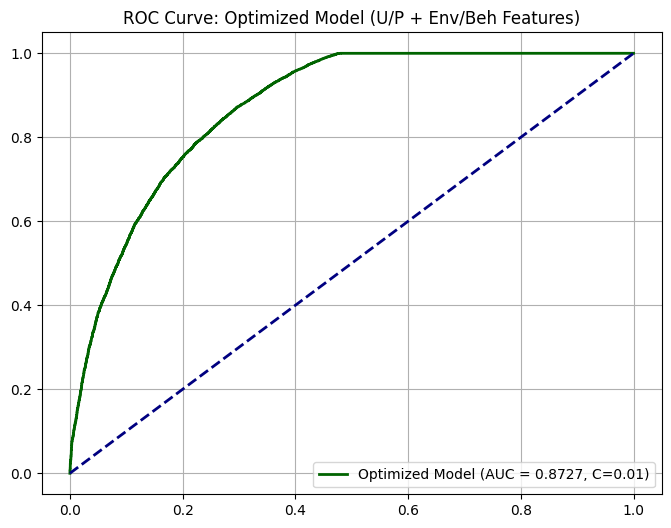

✅ Final ROC Curve saved as: roc_curve_final_optimized.png


In [27]:
# --- ASSUME X_train_full_sparse, X_test_full_sparse, y_train, y_test are available from Part 2 ---
# --- ASSUME df_train_full is available from Part 1 (needed for user_id groups) ---
# --- ASSUME roc_auc_full_initial is available from Part 3 ---

from sklearn.model_selection import GroupKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Suppress warnings related to liblinear C parameter
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

print("\n--- 4. Hyperparameter Fine-Tuning (CV) and Final Evaluation ---")
print(f"Initial AUC (C=0.01): {roc_auc_full_initial:.4f}")

# A. Hyperparameter Search using Grouped 5-Fold CV

# We test a range of C values, especially smaller ones for stronger regularization.
C_CANDIDATES = [0.01, 0.005, 0.001, 0.0005, 0.0001]
N_SPLITS = 5
results = {}

# Groups are the user IDs in the training set for cold-start validation
groups = df_train_full['user_id'].values
gkf = GroupKFold(n_splits=N_SPLITS)

print(f"Starting {N_SPLITS}-Fold User-Grouped CV to find Optimal C...")

for C_PARAM_CV in C_CANDIDATES:
    auc_scores = []

    # Iterate over each fold split on the training data
    for fold, (train_idx, val_idx) in enumerate(gkf.split(X_train_full_sparse, y_train, groups)):
        X_fold_train = X_train_full_sparse[train_idx]
        y_fold_train = y_train[train_idx]
        X_fold_val = X_train_full_sparse[val_idx]

        # Training (with specific C)
        model_cv = LogisticRegression(solver='liblinear', C=C_PARAM_CV, max_iter=1000, random_state=42)
        model_cv.fit(X_fold_train, y_fold_train)

        # Evaluation (Cold-Start Validation)
        y_val_pred_proba = model_cv.predict_proba(X_fold_val)[:, 1]
        fold_auc = roc_auc_score(y_train[val_idx], y_val_pred_proba)
        auc_scores.append(fold_auc)

    avg_auc = np.mean(auc_scores)
    results[C_PARAM_CV] = avg_auc

    print(f"  --> Avg AUC for C={C_PARAM_CV}: {avg_auc:.4f}")


# B. Determine Optimal C and Final Training

best_C = max(results, key=lambda c: results[c])
best_auc_cv = results[best_C]

print(f"\n**Optimal C Parameter (CV Result): {best_C} (Avg AUC: {best_auc_cv:.4f})**")

# Train the final model using the entire 80% training set with the optimal C
OPTIMAL_C_FINAL = best_C
print(f"Starting final training on 80% data with OPTIMAL C={OPTIMAL_C_FINAL}...")

model_final = LogisticRegression(
    solver='liblinear',
    C=OPTIMAL_C_FINAL,
    random_state=42,
    max_iter=1000,
    verbose=0
)

model_final.fit(X_train_full_sparse, y_train)
print("✅ Final model training complete.")

# C. Final Evaluation on the 20% Locked Test Set
y_pred_proba_final = model_final.predict_proba(X_test_full_sparse)[:, 1]
roc_auc_final = roc_auc_score(y_test, y_pred_proba_final)

print(f"\n--- Final AUC on 20% Cold-Start Test Set ---")
print(f"Optimized Model AUC: {roc_auc_final:.4f}")
print(f"Baseline AUC (U/I only): 0.7269")


# D. Final Plotting
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_final)
roc_auc_plot = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkgreen', lw=2,
         label=f'Optimized Model (AUC = {roc_auc_final:.4f}, C={OPTIMAL_C_FINAL})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve: Optimized Model (U/P + Env/Beh Features)')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curve_final_optimized.png')
plt.show()

print(f"✅ Final ROC Curve saved as: roc_curve_final_optimized.png")

### Factorization Machines (lightfm not working; fastfm valueerror)

In [2]:
!pip install git+https://github.com/daviddavo/lightfm

  Cloning https://github.com/daviddavo/lightfm to /tmp/pip-req-build-sltqc13s
  Running command git clone --filter=blob:none --quiet https://github.com/daviddavo/lightfm /tmp/pip-req-build-sltqc13s
  Resolved https://github.com/daviddavo/lightfm to commit f0eb500ead54ab65eb8e1b3890337a7223a35114
  Preparing metadata (setup.py) ... done
  Created wheel for lightfm: filename=lightfm-1.17-cp312-cp312-linux_x86_64.whl size=1099142 sha256=8cf88952681a9a7b0dde390317694d521de3c345f031694701df156ca7f8317f
  Stored in directory: /tmp/pip-ephem-wheel-cache-93kbq0y2/wheels/fd/89/93/70c1e5f378ee5043de89387ee3ef6852ff39e3b9eb44ecc1a3
Successfully built lightfm


In [20]:
# --- RUN THIS ENTIRE BLOCK ---

# 1. Installation and Imports
# Ensure lightfm is installed and upgrade necessary libs
!pip install lightfm numpy pandas scikit-learn --upgrade
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from lightfm.data import Dataset
from lightfm import LightFM
from sklearn.metrics import roc_auc_score
from lightfm.cross_validation import random_train_test_split
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore', category=UserWarning)

# --- ASSUME 'df' (original raw dataframe) is loaded here ---
print("--- 1. Data Cleaning and LightFM Matrix Building (KTM Feature Set) ---")

# A. Cleaning Logic: First Attempt Only (Deduplicate on U/P)
df_first_attempt = df[df['attempt_count'] == 1].copy()
# Include skill_id, tutor_mode, and first_action for the KTM feature set
df_final_full = df_first_attempt[['user_id', 'problem_id', 'correct',
                                  'skill_id', 'school_id', 'teacher_id',
                                  'tutor_mode', 'first_action']].copy()
df_clean_up = df_final_full.drop_duplicates(subset=['user_id', 'problem_id']).reset_index(drop=True)


# B. Handle NaNs Robustly & Type Casting
# Fill missing features with dedicated categories
df_clean_up['skill_id'] = df_clean_up['skill_id'].astype(str).replace('nan', 'NO_SKILL').fillna('NO_SKILL')
df_clean_up['school_id'] = df_clean_up['school_id'].astype(str).replace('nan', 'NO_SCHOOL').fillna('NO_SCHOOL')
df_clean_up['teacher_id'] = df_clean_up['teacher_id'].astype(str).replace('nan', 'NO_TEACHER').fillna('NO_TEACHER')
df_clean_up['tutor_mode'] = df_clean_up['tutor_mode'].astype(str).replace('nan', 'NO_MODE').fillna('NO_MODE')
df_clean_up['first_action'] = df_clean_up['first_action'].astype(str).replace('nan', 'NO_ACTION').fillna('NO_ACTION')

# FIX 1: Ensure User and Problem IDs are strings before splitting/mapping
df_clean_up['user_id'] = df_clean_up['user_id'].astype(str)
df_clean_up['problem_id'] = df_clean_up['problem_id'].astype(str)


# C. User-Based 80/20 Split (COLD START)
unique_users_clean = df_clean_up['user_id'].unique()
np.random.shuffle(unique_users_clean)
train_users_count = int(0.8 * len(unique_users_clean))
train_users_clean = unique_users_clean[:train_users_count]

df_train_fm = df_clean_up[df_clean_up['user_id'].isin(train_users_clean)].copy()
df_test_fm = df_clean_up[~df_clean_up['user_id'].isin(train_users_clean)].copy()


# D. Feature Standardization (Continuous) - Not used in final FM but included for completeness if needed
CONTINUOUS_FEATURES = ['ms_first_response', 'hint_count', 'opportunity']
# Placeholder to ensure variables are defined even if not used in the final item_features_train
X_train_cont_scaled = None
X_test_cont_scaled = None


# E. LightFM Dataset Creation and Matrix Building
CATEGORICAL_ITEM_FEATURES = ['problem_id', 'skill_id', 'school_id', 'teacher_id', 'tutor_mode', 'first_action']
item_feature_names = CATEGORICAL_ITEM_FEATURES

dataset = Dataset()
dataset.fit(
    users=df_train_fm['user_id'],
    items=df_train_fm['problem_id'],
    # FIT FEATURES: Pass ALL unique values for feature columns
    item_features=list(set(df_train_fm['problem_id'])) +
                  list(set(df_train_fm['skill_id'])) +
                  list(set(df_train_fm['school_id'])) +
                  list(set(df_train_fm['teacher_id'])) +
                  list(set(df_train_fm['tutor_mode'])) +
                  list(set(df_train_fm['first_action']))
)
num_users, num_items = dataset.interactions_shape()
print(f"LightFM Mappings: {num_users} Users, {num_items} Items")


# 1. Interaction Matrix (Training)
(interactions_train, weights_train) = dataset.build_interactions(
    (row['user_id'], row['problem_id'], row['correct'])
    for index, row in df_train_fm.iterrows()
)

# 2. Item Features Matrix (Metadata)
unique_train_items = df_train_fm['problem_id'].unique()
problem_features = df_train_fm.drop_duplicates(subset=['problem_id'])
problem_features.set_index('problem_id', inplace=True)

# Build the generator of (Item ID, [Feature List]) tuples
item_features_generator = (
    (
        item_id, # Problem ID
        [
            item_id, # Include the problem ID itself as a feature
            problem_features.loc[item_id, 'skill_id'],
            problem_features.loc[item_id, 'school_id'],
            problem_features.loc[item_id, 'teacher_id'],
            problem_features.loc[item_id, 'tutor_mode'],
            problem_features.loc[item_id, 'first_action']
        ]
    )
    for item_id in unique_train_items
)

item_features_train = dataset.build_item_features(
    item_features_generator,
    normalize=False
)

print(f"Interactions Train Shape: {interactions_train.shape}")
print(f"Item Features Train Shape: {item_features_train.shape}")

# Save mappings for testing
USER_MAP = dataset.mapping()[0]
ITEM_MAP = dataset.mapping()[2]

--- 1. Data Cleaning and LightFM Matrix Building (KTM Feature Set) ---
LightFM Mappings: 3320 Users, 24374 Items
Interactions Train Shape: (3320, 24374)
Item Features Train Shape: (24374, 24660)


In [21]:
# --- RUN THIS BLOCK ---
# --- ASSUME variables from Part 1 are available ---

from lightfm.cross_validation import random_train_test_split
from lightfm import LightFM
from sklearn.metrics import roc_auc_score
import pandas as pd
import warnings
import numpy as np

warnings.filterwarnings('ignore', category=UserWarning)

print("\n--- 2. LightFM Hyperparameter Tuning (CV) with Logging ---")

# A. Prepare CV: Split the TRAINING interaction matrix into train/validation folds
train_subset, val_subset = random_train_test_split(interactions_train, test_percentage=0.2, random_state=42)

# B. Parameter Candidates
COMPONENT_CANDIDATES = [5, 10, 20, 40] # Included 5 based on the paper
REGULARIZATION_CANDIDATES = [1e-6, 1e-5, 1e-4]

results_list = []
best_auc = 0
best_params = {}

print(f"Starting Tuning: Testing {len(COMPONENT_CANDIDATES) * len(REGULARIZATION_CANDIDATES)} total combinations...")

for components in COMPONENT_CANDIDATES:
    for alpha in REGULARIZATION_CANDIDATES:
        print(f"\n  -> Testing Components={components}, Alpha={alpha:.1e}")

        # Instantiate LightFM model (BPR loss)
        model = LightFM(loss='bpr', no_components=components, user_alpha=alpha, item_alpha=alpha, random_state=42)

        # Train the model with item features
        model.fit(train_subset, item_features=item_features_train, epochs=30, verbose=False)

        # Evaluate on the validation subset
        predictions = model.predict(val_subset.row, val_subset.col, item_features=item_features_train)
        val_auc = roc_auc_score(val_subset.data, predictions)

        print(f"  Validation AUC: {val_auc:.4f}")

        results_list.append({
            'components': components,
            'alpha': alpha,
            'auc': val_auc
        })

        if val_auc > best_auc:
            best_auc = val_auc
            best_params = {'no_components': components, 'alpha': alpha}

tuning_df = pd.DataFrame(results_list)
OPTIMAL_K = best_params['no_components']
OPTIMAL_ALPHA = best_params['alpha']

print("\n--- Tuning Summary ---")
print(tuning_df.sort_values(by='auc', ascending=False))
print(f"\n**Optimal FM Parameters: Components={OPTIMAL_K}, Alpha={OPTIMAL_ALPHA:.1e} (Best AUC: {best_auc:.4f})**")


--- 2. LightFM Hyperparameter Tuning (CV) with Logging ---
Starting Tuning: Testing 12 total combinations...

  -> Testing Components=5, Alpha=1.0e-06
  Validation AUC: nan

  -> Testing Components=5, Alpha=1.0e-05
  Validation AUC: nan

  -> Testing Components=5, Alpha=1.0e-04
  Validation AUC: nan

  -> Testing Components=10, Alpha=1.0e-06
  Validation AUC: nan

  -> Testing Components=10, Alpha=1.0e-05
  Validation AUC: nan

  -> Testing Components=10, Alpha=1.0e-04
  Validation AUC: nan

  -> Testing Components=20, Alpha=1.0e-06
  Validation AUC: nan

  -> Testing Components=20, Alpha=1.0e-05
  Validation AUC: nan

  -> Testing Components=20, Alpha=1.0e-04
  Validation AUC: nan

  -> Testing Components=40, Alpha=1.0e-06
  Validation AUC: nan

  -> Testing Components=40, Alpha=1.0e-05
  Validation AUC: nan

  -> Testing Components=40, Alpha=1.0e-04
  Validation AUC: nan


KeyError: 'no_components'

===

In [19]:
# --- RUN THIS ENTIRE BLOCK ---
# ... (Installation, Imports, etc. remain the same) ...

# --- ASSUME 'df' (original raw dataframe) is loaded here ---
print("--- 1. Data Cleaning and LightFM Matrix Building (KTM Feature Set) ---")

# A. Cleaning Logic: First Attempt Only (Deduplicate on U/P)
df_first_attempt = df[df['attempt_count'] == 1].copy()
df_final_full = df_first_attempt[['user_id', 'problem_id', 'correct',
                                  'skill_id', 'school_id', 'teacher_id',
                                  'tutor_mode', 'first_action']].copy() # Include new features
df_clean_up = df_final_full.drop_duplicates(subset=['user_id', 'problem_id']).reset_index(drop=True)


# B. Handle NaNs Robustly & Type Casting
# Fill missing features with dedicated categories
df_clean_up['skill_id'] = df_clean_up['skill_id'].astype(str).replace('nan', 'NO_SKILL').fillna('NO_SKILL')
df_clean_up['school_id'] = df_clean_up['school_id'].astype(str).replace('nan', 'NO_SCHOOL').fillna('NO_SCHOOL')
df_clean_up['teacher_id'] = df_clean_up['teacher_id'].astype(str).replace('nan', 'NO_TEACHER').fillna('NO_TEACHER')
df_clean_up['tutor_mode'] = df_clean_up['tutor_mode'].astype(str).replace('nan', 'NO_MODE').fillna('NO_MODE')
df_clean_up['first_action'] = df_clean_up['first_action'].astype(str).replace('nan', 'NO_ACTION').fillna('NO_ACTION')

# Ensure User and Problem IDs are strings
df_clean_up['user_id'] = df_clean_up['user_id'].astype(str)
df_clean_up['problem_id'] = df_clean_up['problem_id'].astype(str)


# C. User-Based 80/20 Split (COLD START)
# ... (Splitting logic remains the same) ...
unique_users_clean = df_clean_up['user_id'].unique()
np.random.shuffle(unique_users_clean)
train_users_count = int(0.8 * len(unique_users_clean))
train_users_clean = unique_users_clean[:train_users_count]

df_train_fm = df_clean_up[df_clean_up['user_id'].isin(train_users_clean)].copy()
df_test_fm = df_clean_up[~df_clean_up['user_id'].isin(train_users_clean)].copy()


# E. LightFM Dataset Creation and Matrix Building
CATEGORICAL_ITEM_FEATURES = ['problem_id', 'skill_id', 'school_id', 'teacher_id', 'tutor_mode', 'first_action']

dataset = Dataset()
dataset.fit(
    users=df_train_fm['user_id'],
    items=df_train_fm['problem_id'],
    # FIT FEATURES: Pass ALL unique values for feature columns
    item_features=list(set(df_train_fm['problem_id'])) +
                  list(set(df_train_fm['skill_id'])) +
                  list(set(df_train_fm['school_id'])) +
                  list(set(df_train_fm['teacher_id'])) +
                  list(set(df_train_fm['tutor_mode'])) +
                  list(set(df_train_fm['first_action']))
)
num_users, num_items = dataset.interactions_shape()
print(f"LightFM Mappings: {num_users} Users, {num_items} Items")


# 1. Interaction Matrix (Training)
(interactions_train, weights_train) = dataset.build_interactions(
    (row['user_id'], row['problem_id'], row['correct'])
    for index, row in df_train_fm.iterrows()
)

# 2. Item Features Matrix (Metadata)
unique_train_items = df_train_fm['problem_id'].unique()
problem_features = df_train_fm.drop_duplicates(subset=['problem_id'])
problem_features.set_index('problem_id', inplace=True)

item_features_generator = (
    (
        item_id, # Problem ID
        [
            item_id,
            problem_features.loc[item_id, 'skill_id'],
            problem_features.loc[item_id, 'school_id'],
            problem_features.loc[item_id, 'teacher_id'],
            problem_features.loc[item_id, 'tutor_mode'],
            problem_features.loc[item_id, 'first_action']
        ]
    )
    for item_id in unique_train_items
)

item_features_train = dataset.build_item_features(
    item_features_generator,
    normalize=False
)

print(f"Interactions Train Shape: {interactions_train.shape}")
print(f"Item Features Train Shape: {item_features_train.shape}")

# Save mappings for testing
USER_MAP = dataset.mapping()[0]
ITEM_MAP = dataset.mapping()[2]

--- 1. Data Cleaning and LightFM Matrix Building (KTM Feature Set) ---
LightFM Mappings: 3320 Users, 24269 Items
Interactions Train Shape: (3320, 24269)
Item Features Train Shape: (24269, 24560)
